## Import Modules

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2
import random
import tensorflow as tf
from tensorflow import keras
from joblib import dump, load
from tkinter import *
from tkinter import filedialog

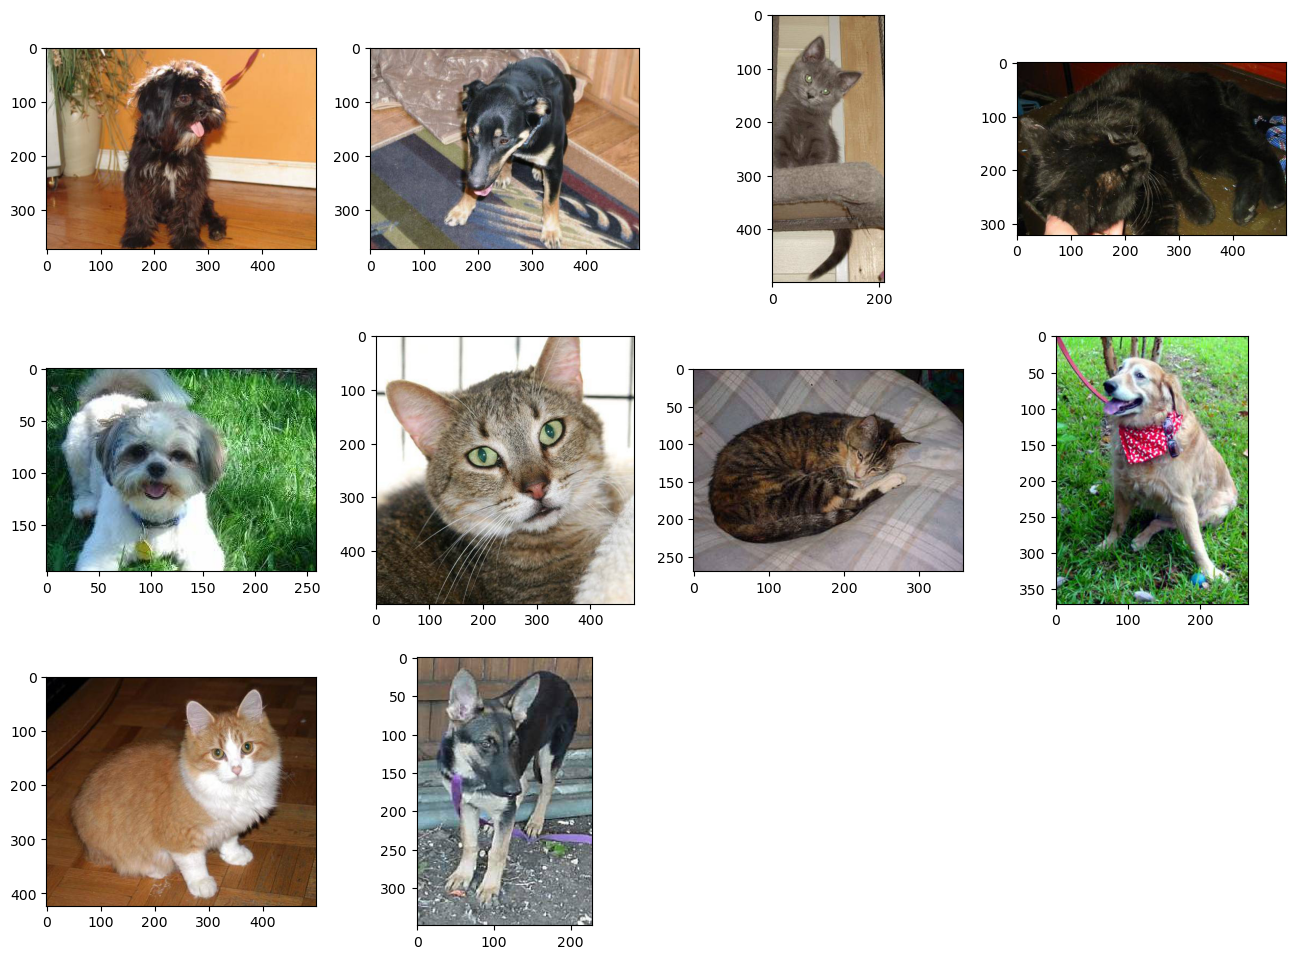

In [31]:
class_names = ["cat", "dog"]
main_dir = "dataset"
train_dir = "train"
path = os.path.join(main_dir, train_dir)
images = os.listdir(path)
plt.figure(figsize=(16, 16))

for i in range(10):
   img = random.choice([x for x in images])
   fig = plt.subplot(4, 4, i + 1)
   img = mpimg.imread(os.path.join(path, img))
   fig.imshow(img)

In [122]:
X = []
y = []
convert = lambda category : int(category == "dog")

for p in os.listdir(path):
    category = p.split(".")[0]
    category = convert(category)
    img_array = cv2.imread(os.path.join(path, p))
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    X.append(new_img_array)
    y.append(category)
    
X = np.array(X).reshape(-1, 80, 80, 3)
y = np.array(y)

### Normalize Data

In [33]:
X = X / 255.0

### Define CNN model

In [34]:
model = keras.models.Sequential()

# Adds a densly-connected layer to the model
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(80, 80, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

# Add another layer
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

# And another layer
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

# Guess what..? Add another layer
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

# Flatten, then feed the data to the Dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 39, 39, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 18, 18, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 128)        

### Complie the model

In [36]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

### Fit Model with Training Data

In [37]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 61s 95ms/step - loss: 0.6153 - accuracy: 0.6633 - val_loss: 1.1222 - val_accuracy: 0.3026
Epoch 2/20
625/625 [==============================] - 59s 95ms/step - loss: 0.4997 - accuracy: 0.7578 - val_loss: 0.9425 - val_accuracy: 0.4808
Epoch 3/20
625/625 [==============================] - 59s 94ms/step - loss: 0.4081 - accuracy: 0.8125 - val_loss: 0.5590 - val_accuracy: 0.7378
Epoch 4/20
625/625 [==============================] - 63s 100ms/step - loss: 0.3480 - accuracy: 0.8461 - val_loss: 0.4836 - val_accuracy: 0.7650
Epoch 5/20
625/625 [==============================] - 66s 105ms/step - loss: 0.2964 - accuracy: 0.8687 - val_loss: 0.4539 - val_accuracy: 0.8064
Epoch 6/20
625/625 [==============================] - 62s 99ms/step - loss: 0.2517 - accuracy: 0.8928 - val_loss: 0.4024 - val_accuracy: 0.8280
Epoch 7/20
625/625 [==============================] - 62s 99ms/step - loss: 0.2153 - accuracy: 0.9107 - val_loss: 0.3195 - val_accurac

### Data Model Persistence

In [38]:
# dump(model, "model.joblib")
model.save("dog_cat_classifier.model")

INFO:tensorflow:Assets written to: dog_cat_classifier.model\assets


INFO:tensorflow:Assets written to: dog_cat_classifier.model\assets


### Reload Data Model

In [41]:
# model = load("model.joblib")
model = keras.models.load_model("dog_cat_classifier.model")

### Pre-process Test Data

In [127]:
train_dir = "test"
path = os.path.join(main_dir, train_dir)

X_test = []
id_line = []

for p in os.listdir(path):
    id_line.append(p.split(".")[0])
    img_array = cv2.imread(os.path.join(path, p))
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    X_test.append(new_img_array)
    
X_test = np.array(X_test).reshape(-1, 80, 80, 3)
X_test = X_test / 255

### Making predictions With Test Data

In [134]:
predictions = model.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]

391/391 [==============================] - 8s 21ms/step


In [135]:
pd.DataFrame({"id": id_line, "Cat=0, Dog=1": predicted_val})

,id,"Cat=0, Dog=1"
0,1,1
1,10,0
2,100,0
3,1000,1
4,10000,1
...,...,...
12495,9995,1
12496,9996,1
12497,9997,1
12498,9998,0


### Make Visualization of Accuracy Results

In [44]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))

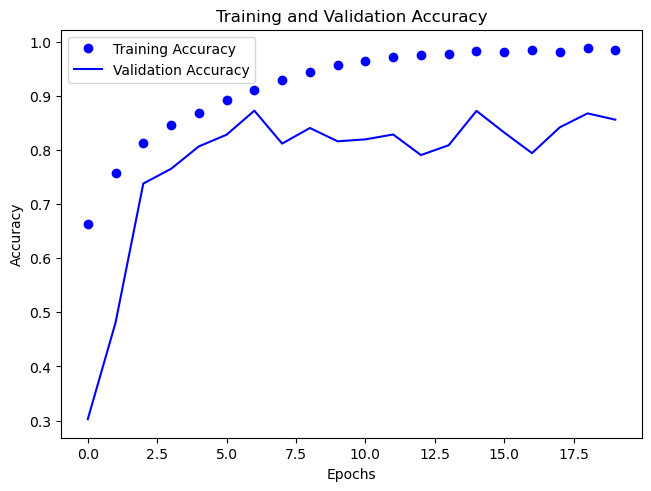

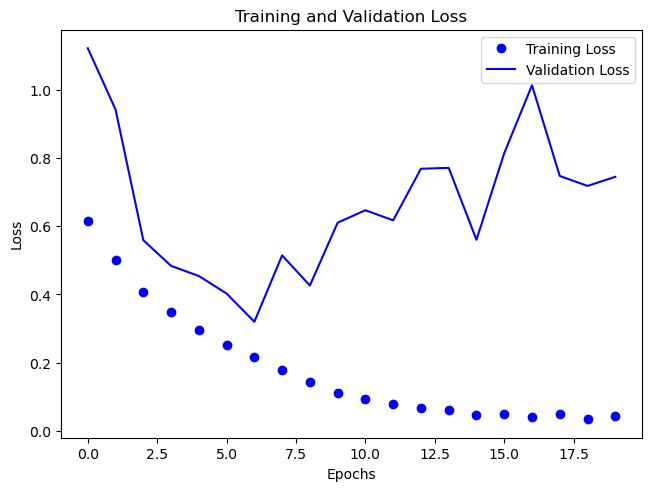

In [45]:
fig_1, ax_1 = plt.subplots(layout="constrained")
ax_1.plot(epochs, acc, "bo", label="Training Accuracy")
ax_1.plot(epochs, val_acc, "b", label="Validation Accuracy")
ax_1.set_title("Training and Validation Accuracy")
ax_1.set_xlabel("Epochs")
ax_1.set_ylabel("Accuracy")
ax_1.legend()

fig_2, ax_2 = plt.subplots(layout="constrained")
ax_2.plot(epochs, loss, "bo", label="Training Loss")
ax_2.plot(epochs, val_loss, "b", label="Validation Loss")
ax_2.set_title("Training and Validation Loss")
ax_2.set_xlabel("Epochs")
ax_2.set_ylabel("Loss")
ax_2.legend()

## Notebook Interactivity

### Have User Select a Cat or Dog Image

In [140]:
filepath = Tk().filename = filedialog.askopenfilename(title="Select A File", filetypes=(("Jpg files", "*.jpg"), ("All Files", "*.*")))
Tk().mainloop()

0


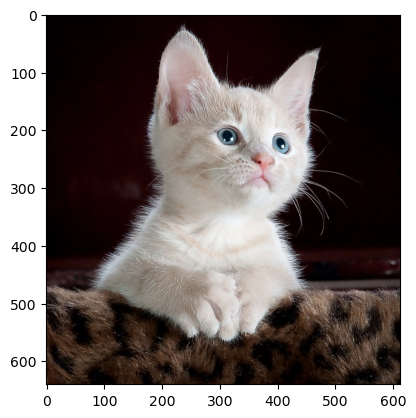

In [141]:

img_array = cv2.imread(filepath)
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

plt.imshow(img_array, cmap=plt.cm.binary)

### Re-scale Selected Image

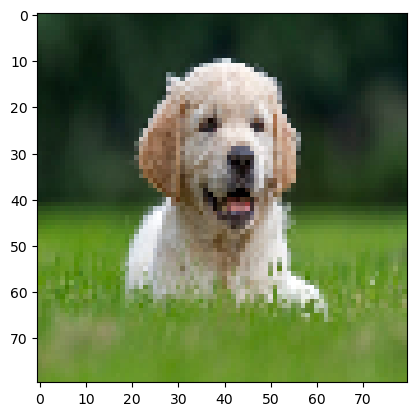

In [106]:
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array, cmap=plt.cm.binary)

### Make Prediction

In [107]:
test = []
test = np.array([new_img_array]).reshape(-1, 80, 80, 3)
test = test / 255
prediction = model.predict(test)

1/1 [==============================] - 0s 21ms/step


In [108]:
index = np.argmax(prediction)
print(index)

0
